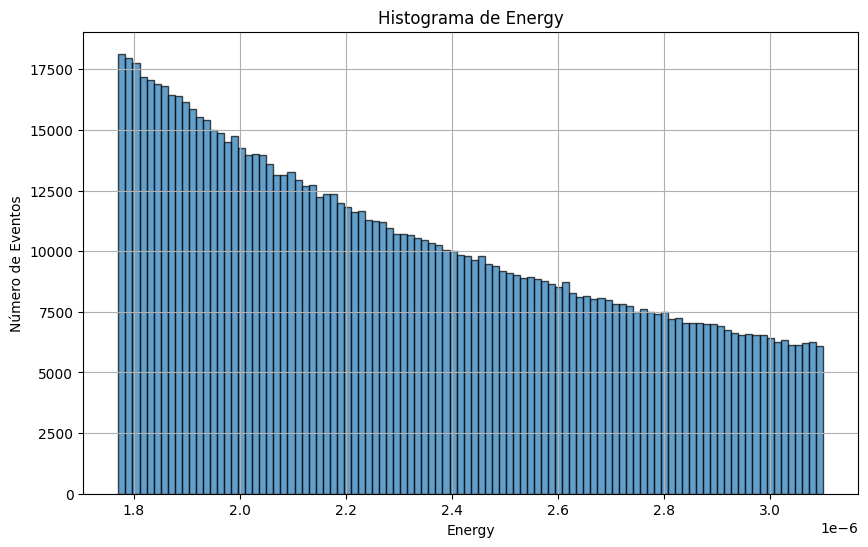

In [21]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt

# Parámetros
file_path = 'C:\Users\conej\Documents\Universidad\Geant4\Projects\Git\G4-PCM\build\Release\Sim0.root'      # Ruta al archivo ROOT
tree_name = 'G4_PCM'        # Nombre del árbol
branch_name = 'Energy'      # Nombre de la categoría

# Abre el archivo ROOT y lee la ntuple
with uproot.open(file_path) as file:
    tree = file[tree_name]
    # Lee toda la ntuple y convierte a un DataFrame
    df = tree.arrays(library="pd")

# Verifica si la columna 'branch_name' está en el DataFrame
if branch_name not in df.columns:
    print(f"Columna '{branch_name}' no encontrada en el DataFrame.")
else:
    # Crea el histograma
    plt.figure(figsize=(10, 6))
    plt.hist(df[branch_name].dropna(), bins=100, edgecolor='black', alpha=0.7)
    plt.title(f'Histograma de {branch_name}')
    plt.xlabel(branch_name)
    plt.ylabel('Número de Eventos')
    plt.grid(True)
    plt.show()


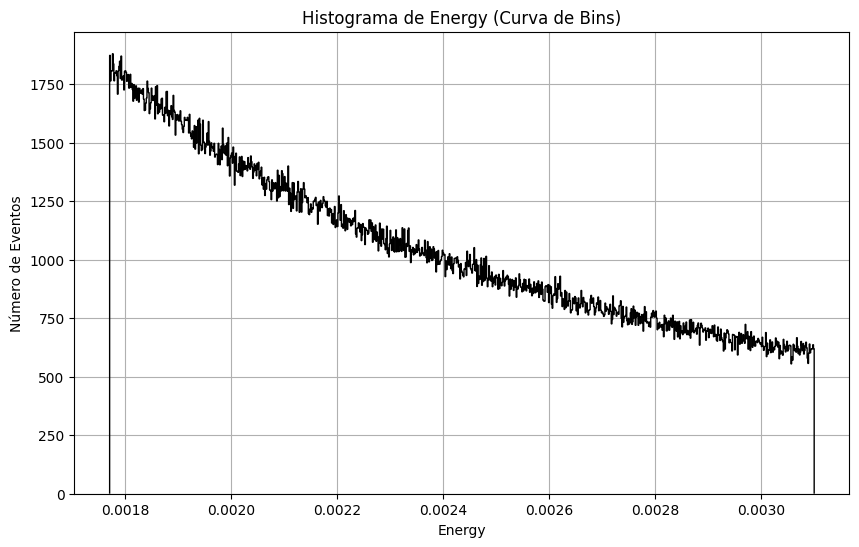

In [9]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt

# Parámetros
file_path = 'Sim0.root'  # Ruta al archivo ROOT
tree_name = 'G4_PCM'    # Nombre del árbol
branch_name = 'Energy'  # Nombre de la categoría

# Abre el archivo ROOT y lee la ntuple
with uproot.open(file_path) as file:
    tree = file[tree_name]
    # Lee toda la ntuple y convierte a un DataFrame
    df = tree.arrays(library="pd")

# Verifica si la columna 'branch_name' está en el DataFrame
if branch_name not in df.columns:
    print(f"Columna '{branch_name}' no encontrada en el DataFrame.")
else:
    # Crea el histograma con una línea para cada bin
    plt.figure(figsize=(10, 6))
    plt.hist(df[branch_name].dropna(), bins=1000, histtype='step', color='black')
    plt.title(f'Histograma de {branch_name} (Curva de Bins)')
    plt.xlabel(branch_name)
    plt.ylabel('Número de Eventos')
    plt.grid(True)
    plt.show()


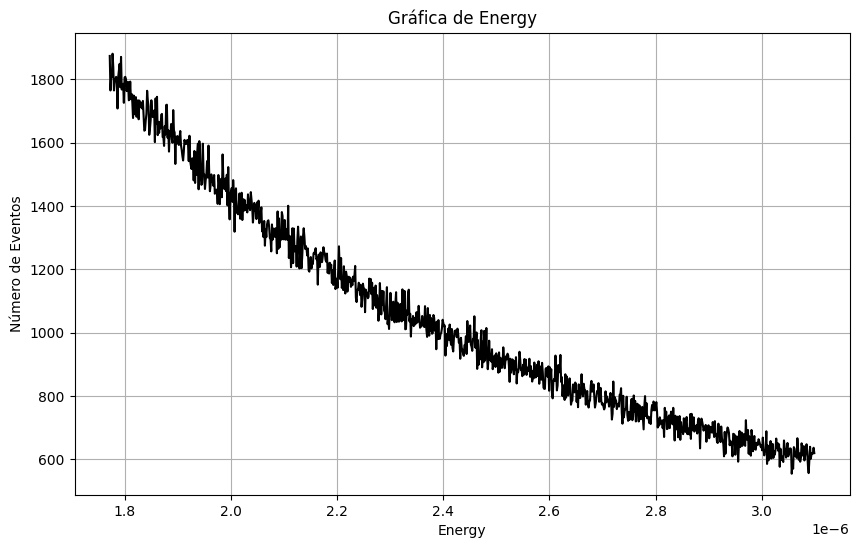

In [22]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parámetros
file_path = 'C:\Users\conej\Documents\Universidad\Geant4\Projects\Git\G4-PCM\build\Release\Sim0.root'  # Ruta al archivo ROOT
tree_name = 'G4_PCM'    # Nombre del árbol
branch_name = 'Energy'  # Nombre de la categoría

# Abre el archivo ROOT y lee la ntuple
with uproot.open(file_path) as file:
    tree = file[tree_name]
    # Lee toda la ntuple y convierte a un DataFrame
    df = tree.arrays(library="pd")

# Verifica si la columna 'branch_name' está en el DataFrame
if branch_name not in df.columns:
    print(f"Columna '{branch_name}' no encontrada en el DataFrame.")
else:
    # Calcula el histograma
    data = df[branch_name].dropna()
    counts, bins = np.histogram(data, bins=1000)

    # Calcula el centro de cada bin
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Crea la gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(bin_centers, counts, linestyle='-', color='black')
    plt.title(f'Gráfica de {branch_name}')
    plt.xlabel(branch_name)
    plt.ylabel('Número de Eventos')
    plt.grid(True)
    plt.show()


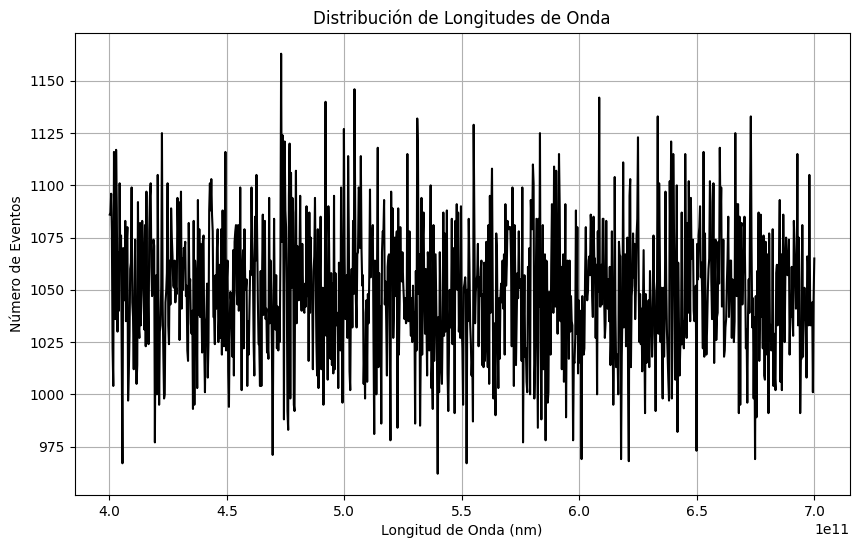

In [24]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parámetros
file_path = 'C:\Users\conej\Documents\Universidad\Geant4\Projects\Git\G4-PCM\build\Release\Sim0.root'  # Ruta al archivo ROOT
tree_name = 'G4_PCM'    # Nombre del árbol
branch_name = 'Energy'  # Nombre de la categoría

# Constantes
eV_to_nm = 1240  # Constante para la conversión de eV a nm

# Abre el archivo ROOT y lee la ntuple
with uproot.open(file_path) as file:
    tree = file[tree_name]
    # Lee toda la ntuple y convierte a un DataFrame
    df = tree.arrays(library="pd")

# Verifica si la columna 'branch_name' está en el DataFrame
if branch_name not in df.columns:
    print(f"Columna '{branch_name}' no encontrada en el DataFrame.")
else:
    # Calcula el histograma
    data = df[branch_name].dropna()

    # Convertir energía (eV) a longitud de onda (nm)
    wavelengths = eV_to_nm / data

    # Calcula el histograma
    counts, bins = np.histogram(wavelengths, bins=1000)

    # Calcula el centro de cada bin
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Crea la gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(bin_centers, counts, linestyle='-', color='black')
    plt.title('Distribución de Longitudes de Onda')
    plt.xlabel('Longitud de Onda (nm)')
    plt.ylabel('Número de Eventos')
    plt.grid(True)
    plt.show()
